# Mevgal Greek Yogurt Product Sales Performance Analysis

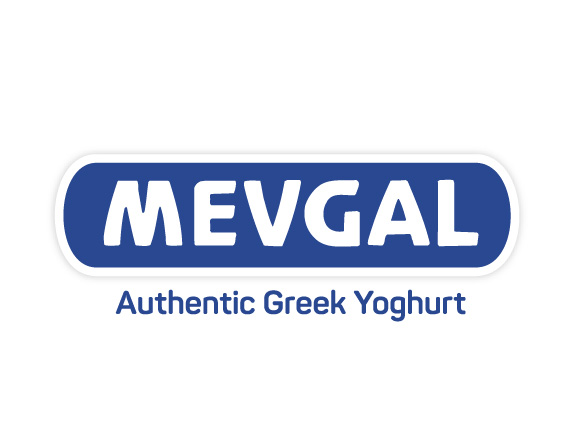

# Summary

The analysis focuses on Mevgal, a Greek yogurt brand, and its sales data for 7 products during the years 2020-2022. The heart of the analysis lies in the exploratory data analysis section, which delves into sales and distribution patterns, total shipped quantities, package sizes, sales trends over time, and sales forecasting. We conducted a comprehensive analysis of each product and a marketing-related analysis of the phenomena reflected in the data. It is a well-organized and comprehensive sales data analysis for the yogurt company in the three years, aimed at providing valuable insights into the company's decision-making process.



---



# I. Company Introduction and Business Problem Definition




**Company Introduction**

MEVGAL is a Greek dairy product manufacturer. It manufactures and sells a wide variety of pasteurized dairy products, including milk, yogurt (both traditional Greek and European), cheeses, desserts, and rice puddings. MEVGAL now produces one in every five yogurts exported by Greece. The company owns a significant share in the Greek Yogurt category in markets ranging from Europe to America and Asia.

**Problem Definition**

 Understand the sales performance for various products at Mevgal over time. With this analysis, we will address the following:

> - Understand the dynamics of the dairy market and its sales patterns.

> - Identify the most successful products and target the marketing and promotional efforts towards those.

> - Aim to understand the impact of various external factors on the dairy market such as the economic, environmental, and technological factors.

**Motivation**

To understand the impact of external factors on the dairy industry is essential not only for business manufacturing and supply chain processes but also for other industries and consumers that rely on dairy products.



---



# II. Data and its Source






**Description of the Data**

The dataset comprises information pertaining to the daily sales of 7 dairy product codes sold by MEVGAL. This information was gathered by the logistics division and agencies operating within the industrial infrastructure responsible for overseeing the production of each product code. These products featured in the dataset encompass daily sales and logistics data for various yogurt-based stock items. Each file within the dataset provides logistics information for a specific product on a daily basis, covering a span of three years from 2020 to 2022.

It is also important for MEVGAL to ensure that the data collection process conducted is in an ethical and compliant manner, adhering to data privacy laws and regulations. It's worth mentioning that, the dataset was anonymized considering the privacy requirement of the data owner (MEVGAL), therefore it might not 100% represent the company's performance.

**Dataset Overview**

The following table explains each feature in the original dataset.

|Index| Feature           | Description | Unit |
|:----------------| :---------------- | :--------| :----: |
|1| Day               |  day of the month   | / |
|2| Month             |  month of the year  | / |
|3| Year              |  year    | / |
| 4| daily_unit_sales |  Daily sales - the amount of products, measured in units, that during that specific day were sold   | units |
| 5| previous_year_daily_unit_sales |  Previous Year's sales - the amount of products, measured in units, that during that specific day were sold, the previous year  | units |
| 6| percentage_difference_daily_unit_sales |  The percentage difference between the two above values  | % |
| 7| daily_unit_sales_kg |  The amount of products, measured in kilograms, that during that specific day were sold  | kg |
| 8| previous_year_daily_unit_sales_kg | Previous Year's sales - the amount of products, measured in kilograms, that during that specific day were sold, the previous year | kg |
| 9|  percentage_difference_daily_unit_sales_kg | The percentage difference between the two above values | % |
| 10|  daily_unit_returns_kg | The percentage of the products (in kg) that were shipped to selling points and were returned | %|
| 11| previous_year_daily_unit_returns_kg | The percentage of the products (in kg) that were shipped to selling points and were returned the previous year | % |
| 12| points_of_distribution | The amount of sales representatives through which the product was sold to the market that day | / |
| 13| previous_year_points_of_distribution | The amount of sales representatives through which the product was sold to the market for the same day in the previous year | / |

**Data Source**

Dairy Supply Chain Sales Dataset. Direct access link here: https://zenodo.org/record/7853252. The data is about the sales of MEVGAL products - https://mevgal.gr/ ; Authors from the University of Western Macedonia published the dataset on ITHACA - https://ithaca.ece.uowm.gr/, and were responsible for the dataset.


---



# III. Data Cleaning and Transformation



## A. Import the Data
We have data in 7 folders corresponding to the 7 products and each folder has 3 Excel files corresponding to daily data for the years 2020 - 2022. We have uploaded the folders to Google Drive and are reading the required files from Google Drive Path.

In [1]:
# Importing Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
# Importing the folders using the Google Drive Paths

paths = []
for i in range(1,8):
  path = input(f'Enter the path for Product {i} folder: ')
  paths.append(path)

Enter the path for Product 1 folder: /content/gdrive/MyDrive/BA780-B04-Team-Project/Product_Sales_Dataset/product 1
Enter the path for Product 2 folder: /content/gdrive/MyDrive/BA780-B04-Team-Project/Product_Sales_Dataset/product 2
Enter the path for Product 3 folder: /content/gdrive/MyDrive/BA780-B04-Team-Project/Product_Sales_Dataset/product 3
Enter the path for Product 4 folder: /content/gdrive/MyDrive/BA780-B04-Team-Project/Product_Sales_Dataset/product 4
Enter the path for Product 5 folder: /content/gdrive/MyDrive/BA780-B04-Team-Project/Product_Sales_Dataset/product 5
Enter the path for Product 6 folder: /content/gdrive/MyDrive/BA780-B04-Team-Project/Product_Sales_Dataset/product 6
Enter the path for Product 7 folder: /content/gdrive/MyDrive/BA780-B04-Team-Project/Product_Sales_Dataset/product 7


In [4]:
# Making sure the column names are same for each dataframe
col_names = ['Day', 'Month', 'Year',
             'daily_unit_sales', 'previous_year_daily_unit_sales', 'percentage_difference_daily_unit_sales',
             'daily_unit_sales_kg', 'previous_year_daily_unit_sales_kg', 'percentage_difference_daily_unit_sales_kg',
             'daily_unit_returns_kg', 'previous_year_daily_unit_returns_kg',
             'points_of_distribution', 'previous_year_points_of_distribution']

In [5]:
# Defining a function for reading files in each product folder
def read_files(path):

  df = pd.DataFrame()
  files = os.listdir(path)

  for f in files:
    data = pd.read_excel(path + '/' + f)
    print(data.shape)

    try:
      if list(data.columns) != col_names:
        data.columns = col_names
    except:
      print('Join anyway')

    df = pd.concat([df,data], ignore_index=True)

  return df

**Creating dataframes for each product & adding a *'product_code'* column**

By using the above-defined function, we combine 3 Excel files for each year to get one table for each product.

Further, we are also adding a **product_code** column to each table in order to differentiate between the 7 different products once we combine all the dataframes into one single table.

In [6]:
# Creating the dataframe for product 1 with data from 3 excel files for the years 2020-2022
product_1 = read_files(paths[0])

# Adding the 'product_code' column
product_1_code = 1
product_1.insert(0, 'product_code', product_1_code)

# Repeating the above two steps for products 2-7
product_2 = read_files(paths[1])
product_2_code = 2
product_2.insert(0, 'product_code', product_2_code)

product_3 = read_files(paths[2])
product_3_code = 3
product_3.insert(0, 'product_code', product_3_code)

product_4 = read_files(paths[3])
product_4_code = 4
product_4.insert(0, 'product_code', product_4_code)

product_5 = read_files(paths[4])
product_5_code = 5
product_5.insert(0, 'product_code', product_5_code)

product_6 = read_files(paths[5])
product_6_code = 6
product_6.insert(0, 'product_code', product_6_code)

product_7 = read_files(paths[6])
product_7_code = 7
product_7.insert(0, 'product_code', product_7_code)

(363, 13)
(365, 13)
(364, 19)
Join anyway
(365, 13)
(362, 13)
(364, 13)
(363, 13)
(365, 13)
(364, 13)
(363, 13)
(364, 13)
(364, 13)
(364, 13)
(366, 13)
(363, 13)
(365, 13)
(365, 13)
(362, 13)
(364, 13)
(365, 13)
(362, 13)


## B. Tidying each DataFrame
We realized it would be a good idea to look into each product briefly and clean the data separately before combining all the 7 products.

**Product 1**

In [7]:
# Checking the dataframe product_1
product_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   product_code                               1092 non-null   int64  
 1   Day                                        1092 non-null   int64  
 2   Month                                      1092 non-null   object 
 3   Year                                       1092 non-null   int64  
 4   daily_unit_sales                           1092 non-null   float64
 5   previous_year_daily_unit_sales             729 non-null    float64
 6   percentage_difference_daily_unit_sales     722 non-null    float64
 7   daily_unit_sales_kg                        1087 non-null   float64
 8   previous_year_daily_unit_sales_kg          723 non-null    float64
 9   percentage_difference_daily_unit_sales_kg  1085 non-null   float64
 10  daily_unit_returns_kg   

In [8]:
# Dropping the Unnamed empty columns from the dataframe
product_1.drop(product_1.iloc[:,14:], axis=1, inplace=True)
product_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   product_code                               1092 non-null   int64  
 1   Day                                        1092 non-null   int64  
 2   Month                                      1092 non-null   object 
 3   Year                                       1092 non-null   int64  
 4   daily_unit_sales                           1092 non-null   float64
 5   previous_year_daily_unit_sales             729 non-null    float64
 6   percentage_difference_daily_unit_sales     722 non-null    float64
 7   daily_unit_sales_kg                        1087 non-null   float64
 8   previous_year_daily_unit_sales_kg          723 non-null    float64
 9   percentage_difference_daily_unit_sales_kg  1085 non-null   float64
 10  daily_unit_returns_kg   

 **Organizing the Data (Product 1)**

We noticed that:
- ***percentage_difference_daily_unit_sales_kg*** has extra values that should not be there.
- ***daily_unit_returns_kg*** has fewer values than expected.

Approach to fix the above issue:
- We realized that the extra values in *percentage_difference_daily_unit_sales_kg* were incorrectly recorded in this column and should actually belong to the *daily_unit_returns_kg* column.
- Shifting the values between the two columns solves the above-stated issue.

In [9]:
# Checking the dataframe product_1
product_1[product_1.Year == 2020].info()
product_1[product_1.Year == 2020].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   product_code                               363 non-null    int64  
 1   Day                                        363 non-null    int64  
 2   Month                                      363 non-null    object 
 3   Year                                       363 non-null    int64  
 4   daily_unit_sales                           363 non-null    float64
 5   previous_year_daily_unit_sales             0 non-null      float64
 6   percentage_difference_daily_unit_sales     0 non-null      float64
 7   daily_unit_sales_kg                        363 non-null    float64
 8   previous_year_daily_unit_sales_kg          0 non-null      float64
 9   percentage_difference_daily_unit_sales_kg  363 non-null    float64
 10  daily_unit_returns_kg     

,product_code,Day,Month,Year,daily_unit_sales,previous_year_daily_unit_sales,percentage_difference_daily_unit_sales,daily_unit_sales_kg,previous_year_daily_unit_sales_kg,percentage_difference_daily_unit_sales_kg,daily_unit_returns_kg,previous_year_daily_unit_returns_kg,points_of_distribution,previous_year_points_of_distribution
0,1,1,January,2020,55.0,NaN,NaN,33.0,NaN,0.444444,NaN,NaN,5.0,NaN
1,1,2,January,2020,2028.0,NaN,NaN,1216.8,NaN,0.035205,NaN,NaN,29.0,NaN
2,1,3,January,2020,2848.0,NaN,NaN,1708.8,NaN,0.196842,NaN,NaN,672.0,NaN
3,1,4,January,2020,2154.0,NaN,NaN,1292.4,NaN,0.192956,NaN,NaN,532.0,NaN
4,1,5,January,2020,-9.0,NaN,NaN,-5.4,NaN,inf,NaN,NaN,2.0,NaN


In [10]:
from numpy import NaN

# Shifting the values from 'percentage_difference_daily_unit_sales_kg' column to 'daily_unit_returns_kg' column
product_1.loc[product_1.Year == 2020, 'daily_unit_returns_kg'] = product_1.loc[product_1.Year == 2020, 'percentage_difference_daily_unit_sales_kg']

# Now deleting the values in the 'percentage_difference_daily_unit_sales_kg' column
product_1.loc[product_1.Year == 2020, 'percentage_difference_daily_unit_sales_kg'] = NaN

product_1[product_1.Year == 2020]

,product_code,Day,Month,Year,daily_unit_sales,previous_year_daily_unit_sales,percentage_difference_daily_unit_sales,daily_unit_sales_kg,previous_year_daily_unit_sales_kg,percentage_difference_daily_unit_sales_kg,daily_unit_returns_kg,previous_year_daily_unit_returns_kg,points_of_distribution,previous_year_points_of_distribution
0,1,1,January,2020,55.0,NaN,NaN,33.0,NaN,NaN,0.444444,NaN,5.0,NaN
1,1,2,January,2020,2028.0,NaN,NaN,1216.8,NaN,NaN,0.035205,NaN,29.0,NaN
2,1,3,January,2020,2848.0,NaN,NaN,1708.8,NaN,NaN,0.196842,NaN,672.0,NaN
3,1,4,January,2020,2154.0,NaN,NaN,1292.4,NaN,NaN,0.192956,NaN,532.0,NaN
4,1,5,January,2020,-9.0,NaN,NaN,-5.4,NaN,NaN,inf,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,1,27,December,2020,1517.0,NaN,NaN,910.2,NaN,NaN,0.005898,NaN,33.0,NaN
359,1,28,December,2020,4379.0,NaN,NaN,2627.4,NaN,NaN,0.127689,NaN,770.0,NaN
360,1,29,December,2020,2709.0,NaN,NaN,1625.4,NaN,NaN,0.200177,NaN,753.0,NaN
361,1,30,December,2020,3124.0,NaN,NaN,1874.4,NaN,NaN,0.213890,NaN,804.0,NaN


In [11]:
# Validating the changes
product_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   product_code                               1092 non-null   int64  
 1   Day                                        1092 non-null   int64  
 2   Month                                      1092 non-null   object 
 3   Year                                       1092 non-null   int64  
 4   daily_unit_sales                           1092 non-null   float64
 5   previous_year_daily_unit_sales             729 non-null    float64
 6   percentage_difference_daily_unit_sales     722 non-null    float64
 7   daily_unit_sales_kg                        1087 non-null   float64
 8   previous_year_daily_unit_sales_kg          723 non-null    float64
 9   percentage_difference_daily_unit_sales_kg  722 non-null    float64
 10  daily_unit_returns_kg   

**Product 2**

In [12]:
# Checking the dataframe product_2
product_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   product_code                               1091 non-null   int64  
 1   Day                                        1091 non-null   int64  
 2   Month                                      1091 non-null   object 
 3   Year                                       1091 non-null   int64  
 4   daily_unit_sales                           1091 non-null   int64  
 5   previous_year_daily_unit_sales             1090 non-null   float64
 6   percentage_difference_daily_unit_sales     718 non-null    float64
 7   daily_unit_sales_kg                        1085 non-null   float64
 8   previous_year_daily_unit_sales_kg          722 non-null    float64
 9   percentage_difference_daily_unit_sales_kg  1080 non-null   float64
 10  daily_unit_returns_kg   

 **Organizing the Data (Product 2)**

We noticed that:
- ***previous_year_daily_unit_sales*** and ***previous_year_points_of_distribution*** have extra values that do not correspond with the data for that particular year.
- ***percentage_difference_daily_unit_sales_kg*** and ***previous_year_daily_unit_returns_kg*** have extra values that should not be there.
- ***daily_unit_returns_kg*** and ***points_of_distribution*** have fewer values than expected.

Approach to fix the above issue:
- Removing the values in *previous_year_daily_unit_sales* and *previous_year_points_of_distribution* for the year 2020 will solve the issue of data being present where the value should be NaN (should not exist).
- We realized that the extra values in *percentage_difference_daily_unit_sales_kg* and *previous_year_daily_unit_returns_kg* were incorrectly recorded and should actually belong to the *daily_unit_returns_kg* *point_of_distribution* columns respectively.
- Shifting the values between the two columns solves the above-stated issue.

In [13]:
# Removing the previous_year values for two columns for the year 2020
product_2.loc[product_2.Year == 2020, 'previous_year_daily_unit_sales'] = NaN
product_2.loc[product_2.Year == 2020, 'previous_year_points_of_distribution'] = NaN

product_2[product_2.Year == 2020]

,product_code,Day,Month,Year,daily_unit_sales,previous_year_daily_unit_sales,percentage_difference_daily_unit_sales,daily_unit_sales_kg,previous_year_daily_unit_sales_kg,percentage_difference_daily_unit_sales_kg,daily_unit_returns_kg,previous_year_daily_unit_returns_kg,points_of_distribution,previous_year_points_of_distribution
365,2,1,January,2020,7,NaN,NaN,7.0,NaN,0.416667,NaN,2.0,NaN,NaN
366,2,2,January,2020,822,NaN,NaN,822.0,NaN,0.000000,NaN,9.0,NaN,NaN
367,2,3,January,2020,1145,NaN,NaN,1145.0,NaN,0.044240,NaN,168.0,NaN,NaN
368,2,4,January,2020,955,NaN,NaN,955.0,NaN,0.038268,NaN,108.0,NaN,NaN
369,2,6,January,2020,0,NaN,NaN,0.0,NaN,1.000000,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2,27,December,2020,1644,NaN,NaN,1644.0,NaN,0.000000,NaN,15.0,NaN,NaN
723,2,28,December,2020,1406,NaN,NaN,1406.0,NaN,0.154031,NaN,229.0,NaN,NaN
724,2,29,December,2020,1730,NaN,NaN,1730.0,NaN,0.026449,NaN,194.0,NaN,NaN
725,2,30,December,2020,1181,NaN,NaN,1181.0,NaN,0.038274,NaN,206.0,NaN,NaN


In [14]:
# Shifting the values from 'percentage_difference_daily_unit_sales_kg' column to 'daily_unit_returns_kg' column
product_2.loc[product_2.Year == 2020, 'daily_unit_returns_kg'] = product_2.loc[product_2.Year == 2020, 'percentage_difference_daily_unit_sales_kg']

# Now deleting the values in the 'percentage_difference_daily_unit_sales_kg' column
product_2.loc[product_2.Year == 2020, 'percentage_difference_daily_unit_sales_kg'] = NaN

# Shifting the values from 'previous_year_daily_unit_returns_kg' column to 'points_of_distribution' column
product_2.loc[product_2.Year == 2020, 'points_of_distribution'] = product_2.loc[product_2.Year == 2020, 'previous_year_daily_unit_returns_kg']

# Now deleting the values in the 'previous_year_daily_unit_returns_kg' column
product_2.loc[product_2.Year == 2020, 'previous_year_daily_unit_returns_kg'] = NaN

product_2[product_2.Year == 2020]

,product_code,Day,Month,Year,daily_unit_sales,previous_year_daily_unit_sales,percentage_difference_daily_unit_sales,daily_unit_sales_kg,previous_year_daily_unit_sales_kg,percentage_difference_daily_unit_sales_kg,daily_unit_returns_kg,previous_year_daily_unit_returns_kg,points_of_distribution,previous_year_points_of_distribution
365,2,1,January,2020,7,NaN,NaN,7.0,NaN,NaN,0.416667,NaN,2.0,NaN
366,2,2,January,2020,822,NaN,NaN,822.0,NaN,NaN,0.000000,NaN,9.0,NaN
367,2,3,January,2020,1145,NaN,NaN,1145.0,NaN,NaN,0.044240,NaN,168.0,NaN
368,2,4,January,2020,955,NaN,NaN,955.0,NaN,NaN,0.038268,NaN,108.0,NaN
369,2,6,January,2020,0,NaN,NaN,0.0,NaN,NaN,1.000000,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2,27,December,2020,1644,NaN,NaN,1644.0,NaN,NaN,0.000000,NaN,15.0,NaN
723,2,28,December,2020,1406,NaN,NaN,1406.0,NaN,NaN,0.154031,NaN,229.0,NaN
724,2,29,December,2020,1730,NaN,NaN,1730.0,NaN,NaN,0.026449,NaN,194.0,NaN
725,2,30,December,2020,1181,NaN,NaN,1181.0,NaN,NaN,0.038274,NaN,206.0,NaN


In [15]:
# Validating the changes
product_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   product_code                               1091 non-null   int64  
 1   Day                                        1091 non-null   int64  
 2   Month                                      1091 non-null   object 
 3   Year                                       1091 non-null   int64  
 4   daily_unit_sales                           1091 non-null   int64  
 5   previous_year_daily_unit_sales             728 non-null    float64
 6   percentage_difference_daily_unit_sales     718 non-null    float64
 7   daily_unit_sales_kg                        1085 non-null   float64
 8   previous_year_daily_unit_sales_kg          722 non-null    float64
 9   percentage_difference_daily_unit_sales_kg  718 non-null    float64
 10  daily_unit_returns_kg   

 **Product 3**

In [16]:
# Checking the dataframe product_3
product_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   product_code                               1092 non-null   int64  
 1   Day                                        1092 non-null   int64  
 2   Month                                      1092 non-null   object 
 3   Year                                       1092 non-null   int64  
 4   daily_unit_sales                           1087 non-null   float64
 5   previous_year_daily_unit_sales             723 non-null    float64
 6   percentage_difference_daily_unit_sales     722 non-null    float64
 7   daily_unit_sales_kg                        1087 non-null   float64
 8   previous_year_daily_unit_sales_kg          723 non-null    float64
 9   percentage_difference_daily_unit_sales_kg  723 non-null    float64
 10  daily_unit_returns_kg   

 **Product 4**

In [17]:
# Checking the dataframe product_4
product_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   product_code                               1091 non-null   int64  
 1   Day                                        1091 non-null   int64  
 2   Month                                      1091 non-null   object 
 3   Year                                       1091 non-null   int64  
 4   daily_unit_sales                           1088 non-null   float64
 5   previous_year_daily_unit_sales             725 non-null    float64
 6   percentage_difference_daily_unit_sales     725 non-null    float64
 7   daily_unit_sales_kg                        1088 non-null   float64
 8   previous_year_daily_unit_sales_kg          725 non-null    float64
 9   percentage_difference_daily_unit_sales_kg  725 non-null    float64
 10  daily_unit_returns_kg   

 **Product 5**

In [18]:
# Checking the dataframe product_5
product_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   product_code                               1093 non-null   int64  
 1   Day                                        1092 non-null   float64
 2   Month                                      1092 non-null   object 
 3   Year                                       1005 non-null   float64
 4   daily_unit_sales                           1087 non-null   float64
 5   previous_year_daily_unit_sales             724 non-null    float64
 6   percentage_difference_daily_unit_sales     721 non-null    float64
 7   daily_unit_sales_kg                        1087 non-null   float64
 8   previous_year_daily_unit_sales_kg          724 non-null    float64
 9   percentage_difference_daily_unit_sales_kg  721 non-null    object 
 10  daily_unit_returns_kg   

- On examining the Product 5 info, we see 1 null value in the 'Day' column.
- The null values have a corresponding summary for the particular year, which is not needed for our analysis, so we drop that row and change the datatype for 'Day' column to integer.

In [19]:
# Getting the index number and row for entries having null value in Day Column
emp = product_5['Day'].isnull()
null_index = product_5.loc[emp].index
print(null_index)
print(product_5.loc[null_index])

# Dropping the row where there is a summary in the original dataset
# product_5.dropna(subset = ['Day'])
product_5 = product_5[product_5['Day'].notna()]

Int64Index([729], dtype='int64')
     product_code  Day Month  Year  daily_unit_sales  \
729             5  NaN   NaN   NaN           55892.0   

     previous_year_daily_unit_sales  percentage_difference_daily_unit_sales  \
729                         52821.0                                 0.05814   

     daily_unit_sales_kg  previous_year_daily_unit_sales_kg  \
729              33535.2                            31692.6   

    percentage_difference_daily_unit_sales_kg daily_unit_returns_kg  \
729                                   0.05814              0.063497   

    previous_year_daily_unit_returns_kg  points_of_distribution  \
729                            0.062607                  2824.0   

     previous_year_points_of_distribution  
729                                2565.0  


In [20]:
# Changing the datatype for 'Day' column to integer
product_5['Day'] = product_5['Day'].astype(int)

<ipython-input-20-95b4bec200e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_5['Day'] = product_5['Day'].astype(int)


- We also observed that there are a lot of missing values for the 'Year' column.
- By checking the date values of the null rows, we fill in the relevant details by using ffill, since the missing values belong to the last three months of 2022.

In [21]:
# Getting the index numbers for entries having null value in Year column anf filling with previous rows
temp = product_5['Year'].isnull()
yr_index = product_5.loc[temp].index
print(yr_index)
print(product_5.loc[yr_index])

product_5.loc[:,'Year'] = product_5.loc[:,'Year'].ffill()
print(product_5.loc[yr_index])

Int64Index([642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654,
            655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667,
            668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680,
            681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693,
            694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706,
            707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719,
            720, 721, 722, 723, 724, 725, 726, 727, 728],
           dtype='int64')
     product_code  Day     Month  Year  daily_unit_sales  \
642             5    6   October   NaN            1056.0   
643             5    7   October   NaN             705.0   
644             5    8   October   NaN             445.0   
645             5    9   October   NaN             678.0   
646             5   10   October   NaN             905.0   
..            ...  ...       ...   ...               ...   
724             5   27  December  

<ipython-input-21-e153b9cdc5b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_5.loc[:,'Year'] = product_5.loc[:,'Year'].ffill()


In [22]:
# Changing the datatype for 'Year' column to integer
product_5['Year'] = product_5['Year'].astype(int)

<ipython-input-22-713f14507d7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_5['Year'] = product_5['Year'].astype(int)


In [23]:
# Validating the changes
product_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1092
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   product_code                               1092 non-null   int64  
 1   Day                                        1092 non-null   int64  
 2   Month                                      1092 non-null   object 
 3   Year                                       1092 non-null   int64  
 4   daily_unit_sales                           1086 non-null   float64
 5   previous_year_daily_unit_sales             723 non-null    float64
 6   percentage_difference_daily_unit_sales     720 non-null    float64
 7   daily_unit_sales_kg                        1086 non-null   float64
 8   previous_year_daily_unit_sales_kg          723 non-null    float64
 9   percentage_difference_daily_unit_sales_kg  720 non-null    object 
 10  daily_unit_returns_kg   

 **Product 6**

In [24]:
# Checking the dataframe product_6
product_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   product_code                               1092 non-null   int64  
 1   Day                                        1092 non-null   int64  
 2   Month                                      1092 non-null   object 
 3   Year                                       1092 non-null   int64  
 4   daily_unit_sales                           1092 non-null   float64
 5   previous_year_daily_unit_sales             729 non-null    float64
 6   percentage_difference_daily_unit_sales     721 non-null    float64
 7   daily_unit_sales_kg                        1091 non-null   float64
 8   previous_year_daily_unit_sales_kg          722 non-null    float64
 9   percentage_difference_daily_unit_sales_kg  721 non-null    float64
 10  daily_unit_returns_kg   

**Product 7**

In [25]:
# Checking the dataframe product_7
product_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   product_code                               1091 non-null   int64  
 1   Day                                        1091 non-null   int64  
 2   Month                                      1091 non-null   object 
 3   Year                                       1091 non-null   int64  
 4   daily_unit_sales                           1091 non-null   float64
 5   previous_year_daily_unit_sales             729 non-null    float64
 6   percentage_difference_daily_unit_sales     722 non-null    float64
 7   daily_unit_sales_kg                        1087 non-null   float64
 8   previous_year_daily_unit_sales_kg          723 non-null    float64
 9   percentage_difference_daily_unit_sales_kg  722 non-null    float64
 10  daily_unit_returns_kg   

 We handled incorrect information observed in product 1, product 2, and product 5 on the high level. With product 3, product 4, product 6, and product 7, we didn't notice any significant data inconsistencies.

## C. Combining the data for all 7 Products
After tidying and cleaning up the data, we concatenate all the 7 products (21 Excel files) into one single dataframe called **product.**

In [26]:
# Using pd.concat to combine all the 7 products
product= pd.concat([product_1,product_2,product_3,product_4,product_5,product_6,product_7], ignore_index=True)

In [27]:
# Checking the information of the integrated dataframe
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7641 entries, 0 to 7640
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   product_code                               7641 non-null   int64  
 1   Day                                        7641 non-null   int64  
 2   Month                                      7641 non-null   object 
 3   Year                                       7641 non-null   int64  
 4   daily_unit_sales                           7627 non-null   float64
 5   previous_year_daily_unit_sales             5086 non-null   float64
 6   percentage_difference_daily_unit_sales     5050 non-null   float64
 7   daily_unit_sales_kg                        7611 non-null   float64
 8   previous_year_daily_unit_sales_kg          5061 non-null   float64
 9   percentage_difference_daily_unit_sales_kg  5051 non-null   object 
 10  daily_unit_returns_kg   

 **Changing datatypes**

We notice that some of the numeric columns are actually defined as an _object type_. In order to facilitate calculations and graphing, we will convert the _object_ types to _float_.

In [28]:
# Changing the datatype of the 'percentage_difference_daily_unit_sales', 'daily_unit_returns_kg', 'previous_year_daily_unit_returns_kg' columns to float
# We have accounted for instances where formula error '#DIV/0!' (in Excel) and string '∞' is converted to 'inf' (a float type variable)

product.loc[product.percentage_difference_daily_unit_sales == '#DIV/0!', 'percentage_difference_daily_unit_sales'] = 'inf'
product['percentage_difference_daily_unit_sales'] = product['percentage_difference_daily_unit_sales'].astype(float)

product.loc[product.daily_unit_returns_kg == '∞', 'daily_unit_returns_kg'] = 'inf'
product['daily_unit_returns_kg'] = product['daily_unit_returns_kg'].astype(float)

product.loc[product.previous_year_daily_unit_returns_kg == '∞', 'previous_year_daily_unit_returns_kg'] = 'inf'
product['previous_year_daily_unit_returns_kg'] = product['previous_year_daily_unit_returns_kg'].astype(float)

product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7641 entries, 0 to 7640
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   product_code                               7641 non-null   int64  
 1   Day                                        7641 non-null   int64  
 2   Month                                      7641 non-null   object 
 3   Year                                       7641 non-null   int64  
 4   daily_unit_sales                           7627 non-null   float64
 5   previous_year_daily_unit_sales             5086 non-null   float64
 6   percentage_difference_daily_unit_sales     5050 non-null   float64
 7   daily_unit_sales_kg                        7611 non-null   float64
 8   previous_year_daily_unit_sales_kg          5061 non-null   float64
 9   percentage_difference_daily_unit_sales_kg  5051 non-null   object 
 10  daily_unit_returns_kg   

 **Adding New Metric Columns**

Total kg of product shipped (daily) is calculated using the columns *'daily_unit_sales_kg'* and *'daily_unit_returns_kg'* which are measured as a %.

\begin{align}
        Formula: \texttt{total_shipped_kg} = \frac{\texttt{daily_unit_sales_kg}}{1 - \texttt{daily_unit_returns_kg}}
    \end{align}

\

Actual kg of product that was shipped to the selling point and then returned (daily) is then calculated using the columns *'total_shipped_kg'* and *'daily_unit_returns_kg'*.

\begin{align}
        Formula: \texttt{daily_unit_return_in_kg} = \texttt{[total_shipped_kg]} \times \texttt{[daily_unit_returns_kg]}
    \end{align}

\

In [29]:
# Creating the 'total_shipped_kg' column
product['total_shipped_kg'] = product['daily_unit_sales_kg'] / (1 - product['daily_unit_returns_kg'])

# Also creating the 'daily_unit_return_in_kg' column
product['daily_unit_return_in_kg'] = product['total_shipped_kg'] * product['daily_unit_returns_kg']

product.head()

,product_code,Day,Month,Year,daily_unit_sales,previous_year_daily_unit_sales,percentage_difference_daily_unit_sales,daily_unit_sales_kg,previous_year_daily_unit_sales_kg,percentage_difference_daily_unit_sales_kg,daily_unit_returns_kg,previous_year_daily_unit_returns_kg,points_of_distribution,previous_year_points_of_distribution,total_shipped_kg,daily_unit_return_in_kg
0,1,1,January,2020,55.0,NaN,NaN,33.0,NaN,NaN,0.444444,NaN,5.0,NaN,59.4,26.4
1,1,2,January,2020,2028.0,NaN,NaN,1216.8,NaN,NaN,0.035205,NaN,29.0,NaN,1261.2,44.4
2,1,3,January,2020,2848.0,NaN,NaN,1708.8,NaN,NaN,0.196842,NaN,672.0,NaN,2127.6,418.8
3,1,4,January,2020,2154.0,NaN,NaN,1292.4,NaN,NaN,0.192956,NaN,532.0,NaN,1601.4,309.0
4,1,5,January,2020,-9.0,NaN,NaN,-5.4,NaN,NaN,inf,NaN,2.0,NaN,0.0,NaN


 **Additionally, adding a 'package_size' column**

This package size per unit column can be derived from the columns *'daily_unit_sales_kg'* and *'daily_unit_sales'* as shown below:

\begin{align}
        Formula: \texttt{package_size} = \frac{\texttt{daily_unit_sales_kg}}{\texttt{daily_unit_sales}}
    \end{align}

\

In [30]:
# Creating the 'package_size' column
product['package_size'] = product['daily_unit_sales_kg'] / product['daily_unit_sales']
product.head()

,product_code,Day,Month,Year,daily_unit_sales,previous_year_daily_unit_sales,percentage_difference_daily_unit_sales,daily_unit_sales_kg,previous_year_daily_unit_sales_kg,percentage_difference_daily_unit_sales_kg,daily_unit_returns_kg,previous_year_daily_unit_returns_kg,points_of_distribution,previous_year_points_of_distribution,total_shipped_kg,daily_unit_return_in_kg,package_size
0,1,1,January,2020,55.0,NaN,NaN,33.0,NaN,NaN,0.444444,NaN,5.0,NaN,59.4,26.4,0.6
1,1,2,January,2020,2028.0,NaN,NaN,1216.8,NaN,NaN,0.035205,NaN,29.0,NaN,1261.2,44.4,0.6
2,1,3,January,2020,2848.0,NaN,NaN,1708.8,NaN,NaN,0.196842,NaN,672.0,NaN,2127.6,418.8,0.6
3,1,4,January,2020,2154.0,NaN,NaN,1292.4,NaN,NaN,0.192956,NaN,532.0,NaN,1601.4,309.0,0.6
4,1,5,January,2020,-9.0,NaN,NaN,-5.4,NaN,NaN,inf,NaN,2.0,NaN,0.0,NaN,0.6


 **Adding a 'Date' column**

By combining the **Day, Month**, and **Year** columns, we want to create a **Date** column for effective use in visualizations to show trends over time.

In [31]:
import datetime

# Adding a new month column (in number) representing each corresponding month
product['month'] = product['Month'].apply(lambda x: datetime.datetime.strptime(x, '%B').month)

# Creating the 'Date' column
product['Date'] = pd.to_datetime(product[['Year', 'month', 'Day']], errors='coerce')

# Changing the position of the column in the dataframe
fifth_col = product.pop('Date')
product.insert(4, 'Date', fifth_col)

product.head()

,product_code,Day,Month,Year,Date,daily_unit_sales,previous_year_daily_unit_sales,percentage_difference_daily_unit_sales,daily_unit_sales_kg,previous_year_daily_unit_sales_kg,percentage_difference_daily_unit_sales_kg,daily_unit_returns_kg,previous_year_daily_unit_returns_kg,points_of_distribution,previous_year_points_of_distribution,total_shipped_kg,daily_unit_return_in_kg,package_size,month
0,1,1,January,2020,2020-01-01,55.0,NaN,NaN,33.0,NaN,NaN,0.444444,NaN,5.0,NaN,59.4,26.4,0.6,1
1,1,2,January,2020,2020-01-02,2028.0,NaN,NaN,1216.8,NaN,NaN,0.035205,NaN,29.0,NaN,1261.2,44.4,0.6,1
2,1,3,January,2020,2020-01-03,2848.0,NaN,NaN,1708.8,NaN,NaN,0.196842,NaN,672.0,NaN,2127.6,418.8,0.6,1
3,1,4,January,2020,2020-01-04,2154.0,NaN,NaN,1292.4,NaN,NaN,0.192956,NaN,532.0,NaN,1601.4,309.0,0.6,1
4,1,5,January,2020,2020-01-05,-9.0,NaN,NaN,-5.4,NaN,NaN,inf,NaN,2.0,NaN,0.0,NaN,0.6,1


In [32]:
# Dropping the extra date row for 29th February 2021 since 2021 was not a leap year
# We assume that this entry was due to a manual error and can be dropped without compromising the integrity of the data

temp = product['Date'].isnull()
yr_index = product.loc[temp].index
print(yr_index)

print(product.loc[yr_index])

product = product[product['Date'].notna()]

Int64Index([5517], dtype='int64')
      product_code  Day     Month  Year Date  daily_unit_sales  \
5517             6   29  February  2021  NaT        875.233333   

      previous_year_daily_unit_sales  percentage_difference_daily_unit_sales  \
5517                             0.0                                     NaN   

      daily_unit_sales_kg  previous_year_daily_unit_sales_kg  \
5517               525.14                                NaN   

     percentage_difference_daily_unit_sales_kg  daily_unit_returns_kg  \
5517                                       NaN               0.225252   

      previous_year_daily_unit_returns_kg  points_of_distribution  \
5517                                  NaN                  1439.0   

      previous_year_points_of_distribution  total_shipped_kg  \
5517                                   NaN            677.82   

      daily_unit_return_in_kg  package_size  month  
5517                   152.68           0.6      2  


In [33]:
# Validating the changes
product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7640 entries, 0 to 7640
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   product_code                               7640 non-null   int64         
 1   Day                                        7640 non-null   int64         
 2   Month                                      7640 non-null   object        
 3   Year                                       7640 non-null   int64         
 4   Date                                       7640 non-null   datetime64[ns]
 5   daily_unit_sales                           7626 non-null   float64       
 6   previous_year_daily_unit_sales             5085 non-null   float64       
 7   percentage_difference_daily_unit_sales     5050 non-null   float64       
 8   daily_unit_sales_kg                        7610 non-null   float64       
 9   previous_year_daily

##D. Updated Dataset Overview
The following table explains the features in the clean dataset:

|Index| Feature           | Description | Unit |
|:----------------| :---------------- | :--------| :----: |
|1| product_code      | codes to differentiate between products    | / |
|2| Day               |  day of the month   | / |
|3| Month             |  month   | / |
|4| Year              |  year    | / |
|5| date             |  year-month-day   | / |
| 6| daily_unit_sales |  Daily sales - the amount of products, measured in units, that during that specific day were sold   | units |
| 7| previous_year_daily_unit_sales |  Previous Year's sales - the amount of products, measured in units, that during that specific day were sold the previous year  | units |
| 8| percentage_difference_daily_unit_sales |  The percentage difference between the two above values  | % |
| 9| daily_unit_sales_kg |  The amount of products, measured in kilograms, that during that specific day were sold  | kg |
| 10| previous_year_daily_unit_sales_kg | Previous Year's sales - the amount of products, measured in kilograms, that during that specific day were sold, the previous year | kg |
| 11|  percentage_difference_daily_unit_sales_kg | The percentage difference between the two above values | % |
| 12|  daily_unit_returns_kg | The percentage of the products that were shipped to selling points and were returned | %|
| 13| previous_year_daily_unit_returns_kg | The percentage of the products that were shipped to selling points and were returned the previous year | % |
| 14| points_of_distribution | The amount of sales representatives through which the product was sold to the market for this year | / |
| 15| previous_year_points_of_distribution | The amount of sales representatives through which the product was sold to the market for the same day for the previous year | / |
| 16| total_shipped_kg | The amount of products, measured in kilograms, that during that specific day were shipped to sales representatives | kg |
| 17| daily_unit_return_in_kg | The amount of products, measured in kilograms, that during that specific day were returned to the manufacturer | kg |
| 18| package_size | weight in kg per unit | kg |
| 19| month | month in number | / |


#### **Overview:**
*   There are 7640 rows
*   There are 19 columns with 18 features
*   There are still NA values in columns: 'previous_year_daily_unit_sales', 'percentage_difference_daily_unit_sales', 'previous_year_daily_unit_sales_kg', 'percentage_difference_daily_unit_sales_kg', ' previous_year_daily_unit_returns_kg', 'previous_year_points_of_distribution', and this is because we don't have the data of Year 2019.




---

# IV. Exploratory Data Analysis


**Checking the Basic Statistics for the Columns of Interest**



In [34]:
# Checking the summary statisticss for the columns of interest
product[['daily_unit_sales', 'daily_unit_sales_kg', 'daily_unit_return_in_kg', 'total_shipped_kg']].describe()

,daily_unit_sales,daily_unit_sales_kg,daily_unit_return_in_kg,total_shipped_kg
count,7626.000000,7610.000000,7596.000000,7606.000000
mean,1754.446486,945.857433,95.325592,1041.571031
std,1417.059918,615.565152,119.430633,662.508768
min,-60.000000,-36.000000,-0.024000,-0.624000
25%,759.733333,498.130000,13.300362,570.628571
50%,1283.000000,804.000000,43.219508,900.406686
75%,2357.000000,1237.225000,131.392262,1332.451449
max,10206.000000,4978.800000,1548.000000,5046.926245


### 1.Sales and Distribution Analysis

To begin with, we look at the sales pattern of the yogurts by examining the total values of the *'daily_unit_sales_kg'* column for each of the seven products for the three years.

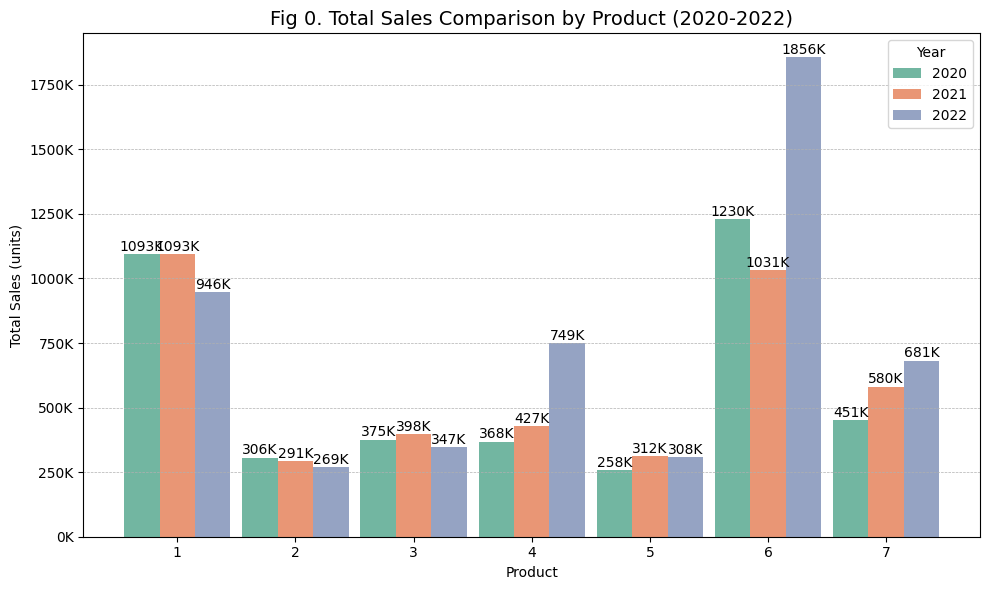

In [74]:
# Grouping by 'product_code' and 'year' to get total sales
total_sales_data = product.groupby(['product_code', 'Year'])['daily_unit_sales'].sum().unstack().reset_index()

# Plotting the Total Sales Comparison by 'product_code' and 'year'
plt.figure(figsize=(10, 6))
bar_width = 0.3
r1 = np.arange(len(total_sales_data))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, total_sales_data[2020], width=bar_width, label='2020', color=['#72B6A1'])
plt.bar(r2, total_sales_data[2021], width=bar_width, label='2021', color=['#E99675'])
plt.bar(r3, total_sales_data[2022], width=bar_width, label='2022', color=['#95A3C3'])

# Formatting y-axis labels in thousands
def format_thousands(x, pos):
    return f'{int(x / 1000)}K'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_thousands))

# Annotating the bars with their values
for r, year in zip(r1, total_sales_data[2020]):
    plt.text(r, year + 1000, f'{int(year / 1000)}K', ha='center', va='bottom', fontsize=10, color='black')

for r, year in zip(r2, total_sales_data[2021]):
    plt.text(r, year + 1000, f'{int(year / 1000)}K', ha='center', va='bottom', fontsize=10, color='black')

for r, year in zip(r3, total_sales_data[2022]):
    plt.text(r, year + 1000, f'{int(year / 1000)}K', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Fig 0. Total Sales Comparison by Product (2020-2022)', fontsize=14)
plt.xlabel('Product', fontsize=10)
plt.ylabel('Total Sales (units)', fontsize=10)
plt.xticks([r + bar_width for r in range(len(total_sales_data))], total_sales_data['product_code'])
plt.legend(title='Year')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.show()

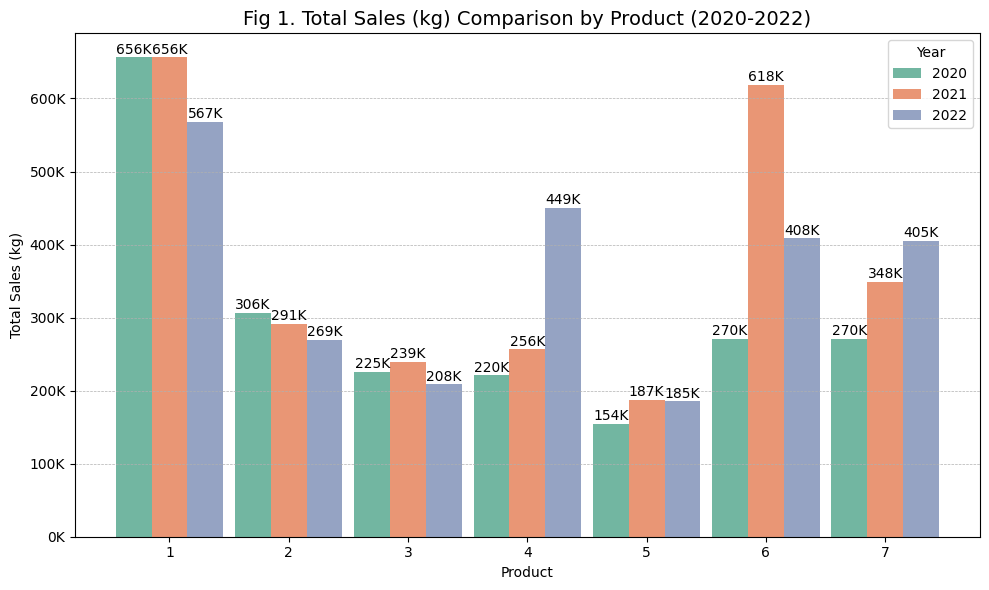

In [51]:
# Grouping by 'product_code' and 'year' to get total sales
total_sales_data = product.groupby(['product_code', 'Year'])['daily_unit_sales_kg'].sum().unstack().reset_index()

# Plotting the Total Sales Comparison by 'product_code' and 'year'
plt.figure(figsize=(10, 6))
bar_width = 0.3
r1 = np.arange(len(total_sales_data))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, total_sales_data[2020], width=bar_width, label='2020', color=['#72B6A1'])
plt.bar(r2, total_sales_data[2021], width=bar_width, label='2021', color=['#E99675'])
plt.bar(r3, total_sales_data[2022], width=bar_width, label='2022', color=['#95A3C3'])

# Formatting y-axis labels in thousands
def format_thousands(x, pos):
    return f'{int(x / 1000)}K'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_thousands))

# Annotating the bars with their values
for r, year in zip(r1, total_sales_data[2020]):
    plt.text(r, year + 1000, f'{int(year / 1000)}K', ha='center', va='bottom', fontsize=10, color='black')

for r, year in zip(r2, total_sales_data[2021]):
    plt.text(r, year + 1000, f'{int(year / 1000)}K', ha='center', va='bottom', fontsize=10, color='black')

for r, year in zip(r3, total_sales_data[2022]):
    plt.text(r, year + 1000, f'{int(year / 1000)}K', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Fig 1. Total Sales (kg) Comparison by Product (2020-2022)', fontsize=14)
plt.xlabel('Product', fontsize=10)
plt.ylabel('Total Sales (kg)', fontsize=10)
plt.xticks([r + bar_width for r in range(len(total_sales_data))], total_sales_data['product_code'])
plt.legend(title='Year')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.show()

**We observe that**
- Product 1 displays the highest sales (in kg) as compared to other products over the period of three years.
- Secondly, Product 6 sales seem to have shot up drastically in the year 2021. That is something we will dive into deeper.
- Product 4 also shows a significant increase in sales in the year 2022.




To better understand the sales jumps for Product 4 and 6, let's check if the 'points_of_distribution' variable has any influence on the sales pattern.

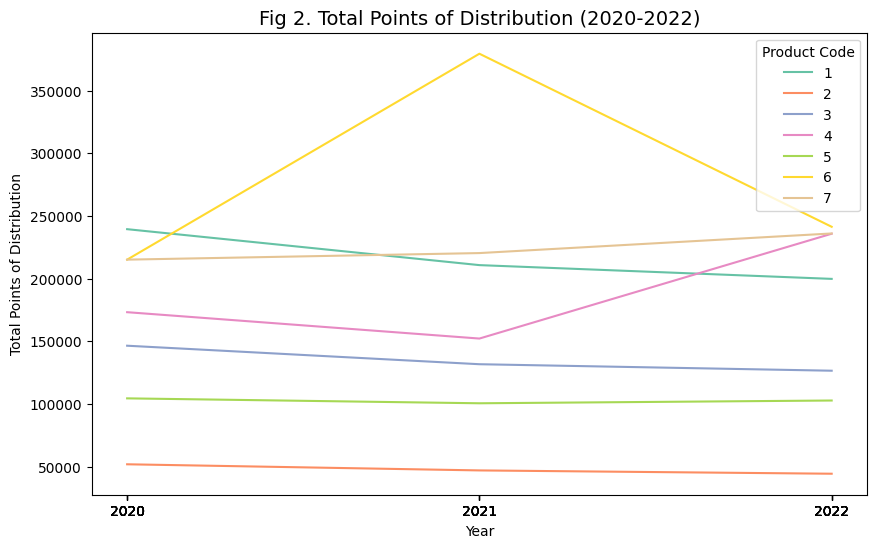

In [52]:
# Plotting the 'points_of_distribution' for all products over the course of 3 years

distribution_points = product.groupby(['Year','product_code'])['points_of_distribution'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='points_of_distribution', data=distribution_points, hue='product_code', palette = sns.color_palette("Set2", n_colors=7))

plt.xlabel('Year', fontsize=10)
plt.ylabel('Total Points of Distribution', fontsize=10)
plt.title('Fig 2. Total Points of Distribution (2020-2022)', fontsize=14)
plt.xticks(distribution_points['Year'])
plt.legend(title='Product Code', loc='upper right')
plt.show()

**Our observations**

- Looking at the above plot, it is clear that the points of distribution for Mevgal remain more or less consistent for all products over the three years, except for Products 4 & 6.
- For Products 4 & 6, there is an increase in the points of distributions for the years 2021 and 2022 respectively which seems to correspond with the increase in total sales observed in the previous graph (Fig 1).
- It is worth mentioning that Product 2 has very few points of distribution throughout.

Since we see that there is an association between points of distribution and the total sales, let's look at the sales pattern per point of distribution!

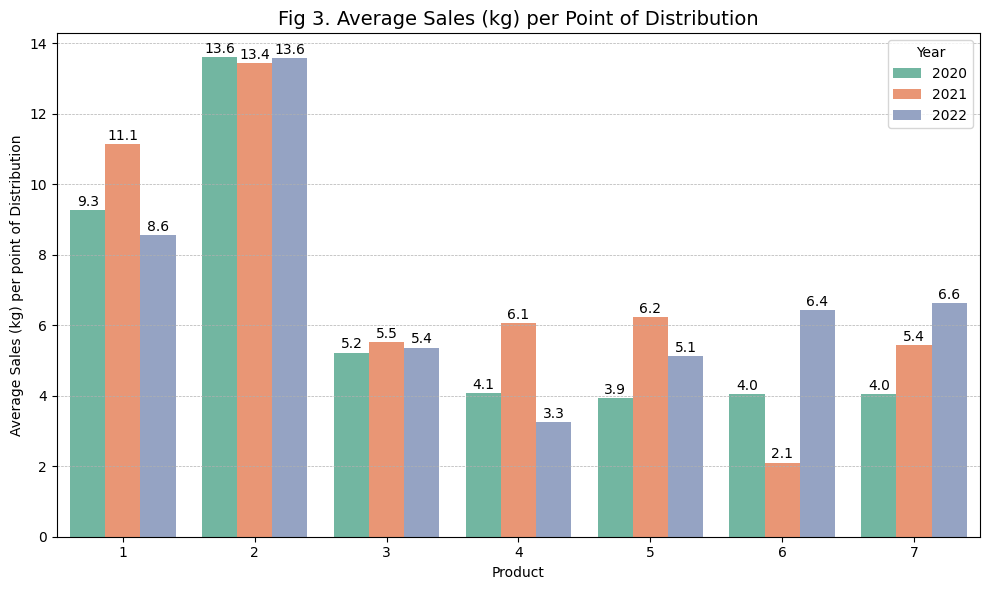

In [53]:
# Plotting the avergae 'daily_unit_sales_kg' per 'point_of_distribution' through 3 years

product_new=product.copy()
product_new['avg_sales_kg_per_distribution']=product_new['daily_unit_sales_kg']/product_new['points_of_distribution']

plt.figure(figsize=(10,6))
ax=sns.barplot(x='product_code',y='avg_sales_kg_per_distribution',hue='Year',data=product_new, palette='Set2',errorbar=None)
plt.title('Fig 3. Average Sales (kg) per Point of Distribution', fontsize=14)
plt.xlabel('Product', fontsize=10)
plt.ylabel('Average Sales (kg) per point of Distribution', fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

# Annotating the bars with their values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center',
                fontsize=10)

plt.tight_layout()
plt.show()

**We notice that**
- Interestingly, Product 1 sales per point of distribution is not the highest as expected from what we observed in Fig 1, but it is still higher than all products barring Product 2.
- To our surprise, Product 2 has the highest sales per point of distribution despite the points of distribution being the lowest (Fig 2). From this, we can assume that if the points of distribution are increased, the total sales for Product 2 might even surpass sales for all products, and it could have the potential of being the bestselling product for Mevgal!

### 2.Total Shipped and Return Analysis

Going further, we want to investigate the *'daily_unit_return_in_kg'* and explore any patterns and anamolies.

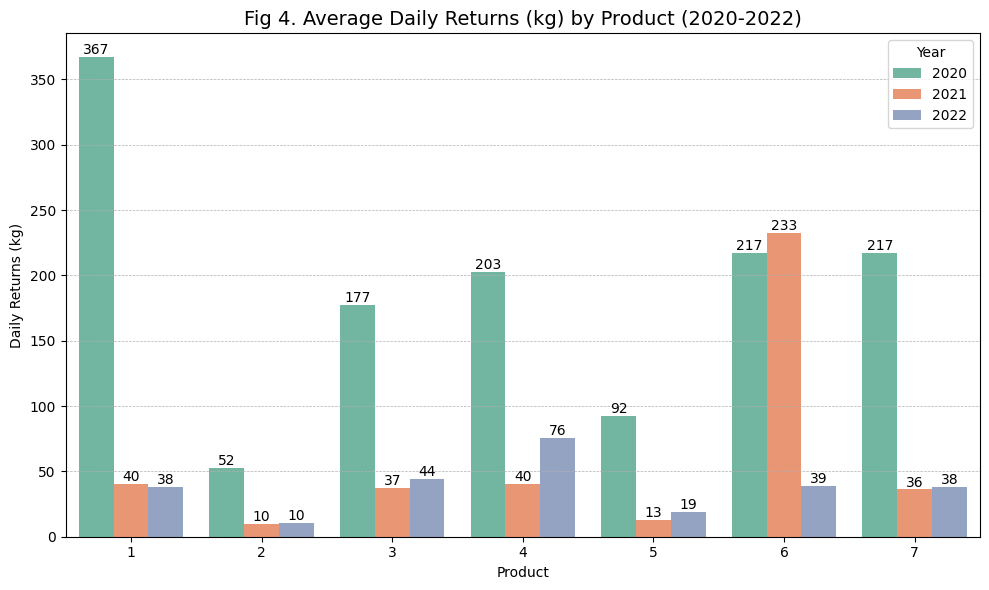

In [57]:
# Plotting the 'daily_unit_return_in_kg' for all products through 3 years

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=product, x='product_code', y='daily_unit_return_in_kg', hue = 'Year', palette=sns.color_palette("Set2"), errorbar=None)

# Annotating the bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height() :.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Fig 4. Average Daily Returns (kg) by Product (2020-2022)', fontsize=14)
plt.xlabel('Product', fontsize=10)
plt.ylabel('Daily Returns (kg)', fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

We see that
- Returns for majority of the products are higher in 2020, the reasons for which will be explored at a later time.
- Product 1 has the highest returns of all products for all three years - an avergae of 367 kgs per day. With the highest sales observed in 2020 for Product 1 (Fig 1), high returns are such a bummer!
- Product 6 seems to have very unusual performance for 2021 across all variables, i.e. total sales (Fig 1), points of distribution (Fig 2) and even the returns as seen here. We are still unaware of the reason behind this phenomenon and would be investigating it further.

Since the number of units shipped is different for each product, let's look at the percentage returns for each.

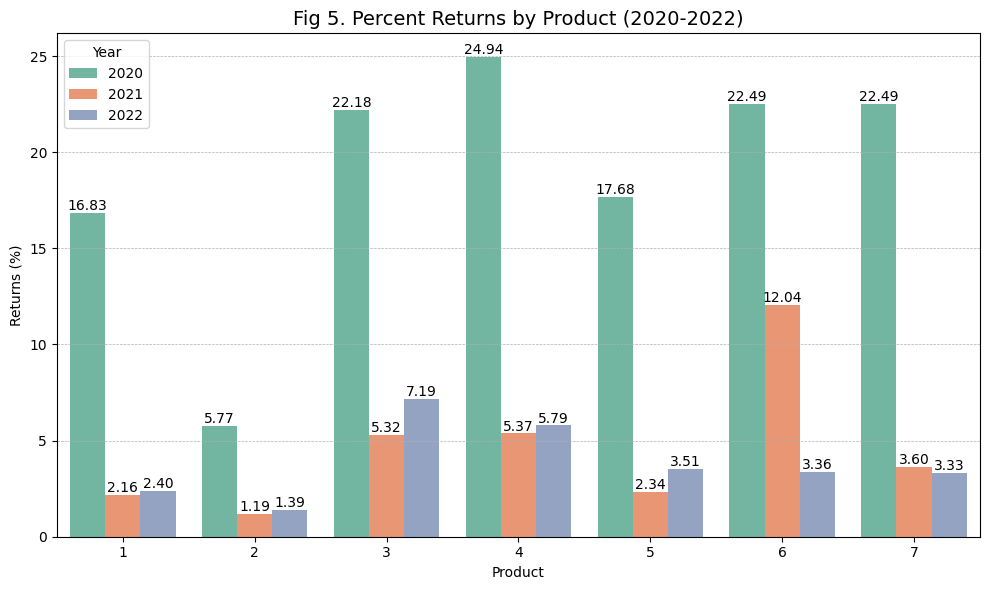

In [55]:
# Plotting the return percentage of all products through 3 years
yearly_data = product[product['Year'].isin([2020, 2021, 2022])]
grouped_data = yearly_data.groupby(['product_code', 'Year'])
totals = grouped_data.agg({'daily_unit_sales_kg': 'sum', 'total_shipped_kg': 'sum'}).reset_index()
totals['return_percentage'] = ((totals['total_shipped_kg'] - totals['daily_unit_sales_kg'])/totals['total_shipped_kg'])*100

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=totals, x='product_code', y='return_percentage', hue='Year', palette="Set2")

plt.title('Fig 5. Percent Returns by Product (2020-2022)', fontsize=14)
plt.xlabel('Product', fontsize=10)
plt.ylabel('Returns (%)', fontsize=10)

# Annotating the bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height() :.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

**Sanity Check**
- For Product 2, the extremely low percent returns (less than 6%) and average returns (Fig 4) reinforces our belief that it is one of the best performers in the market.
- We see that the percent returns in 2020 for Product 1 (16.8%) are lower than the other Products' percent returns (except Product 2). This challenges our observation that Product 1 had the highest returns in kg for 2020.


To explore the disparity between the average returns and percent returns, we might need to check the 'total_shipped_kg' column, which represents the benchmark against which returns are measured.

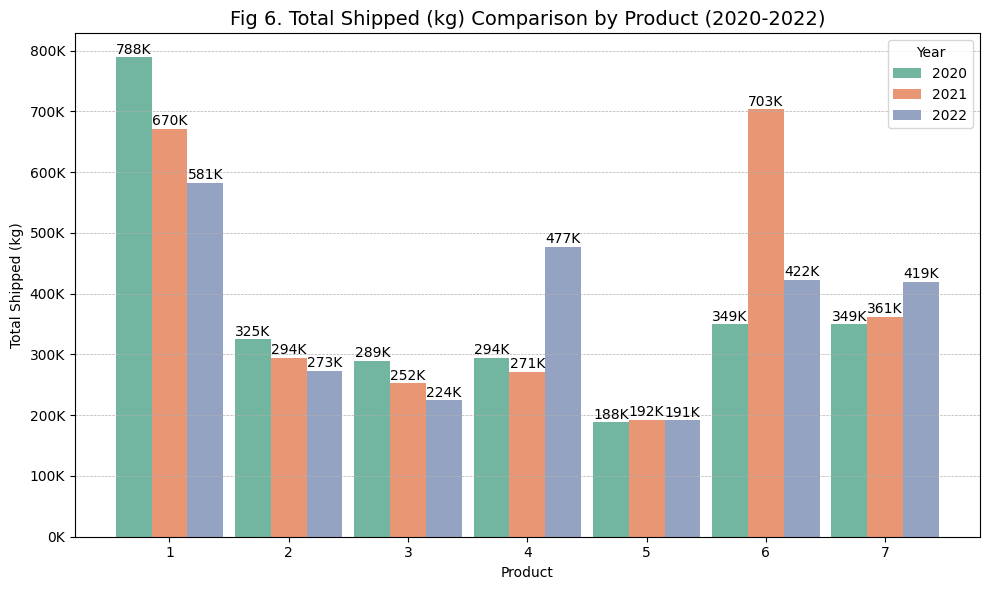

In [56]:
# Grouping by product and year to get total shipped values
total_sales_data = product.groupby(['product_code', 'Year'])['total_shipped_kg'].sum().unstack().reset_index()

# Plotting the 'total_shipped_kg' by Product and Year
plt.figure(figsize=(10, 6))
bar_width = 0.3
r1 = np.arange(len(total_sales_data))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, total_sales_data[2020], width=bar_width, label='2020', color=['#72B6A1'])
plt.bar(r2, total_sales_data[2021], width=bar_width, label='2021', color=['#E99675'])
plt.bar(r3, total_sales_data[2022], width=bar_width, label='2022', color=['#95A3C3'])

# Formatting the y-axis labels in thousands
def format_thousands(x, pos):
    return f'{int(x / 1000)}K'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_thousands))

# Annotating the bars with their values
for r, year in zip(r1, total_sales_data[2020]):
    plt.text(r, year + 1000, f'{int(year / 1000)}K', ha='center', va='bottom', fontsize=10, color='black')

for r, year in zip(r2, total_sales_data[2021]):
    plt.text(r, year + 1000, f'{int(year / 1000)}K', ha='center', va='bottom', fontsize=10, color='black')

for r, year in zip(r3, total_sales_data[2022]):
    plt.text(r, year + 1000, f'{int(year / 1000)}K', ha='center', va='bottom', fontsize=10, color='black')


plt.title('Fig 6. Total Shipped (kg) Comparison by Product (2020-2022)', fontsize=14)
plt.xlabel('Product', fontsize=10)
plt.ylabel('Total Shipped (kg)', fontsize=10)
plt.xticks([r + bar_width for r in range(len(total_sales_data))], total_sales_data['product_code'])
plt.legend(title='Year')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.show()

**Confrimations**

- We see that Product 1 is the most shipped product and it also has very high points of distribution (Fig 2). This explains the highest total sales (Fig 1), the higher average returns (Fig 4) even though the percent returns (Fig 5) are lower.
- Product 6 has a higher shipped quantity for 2021, we will look into this later.

To dive deeper into the higher returns in 2020, we take a look at the monthly return patterns per product over all three years.

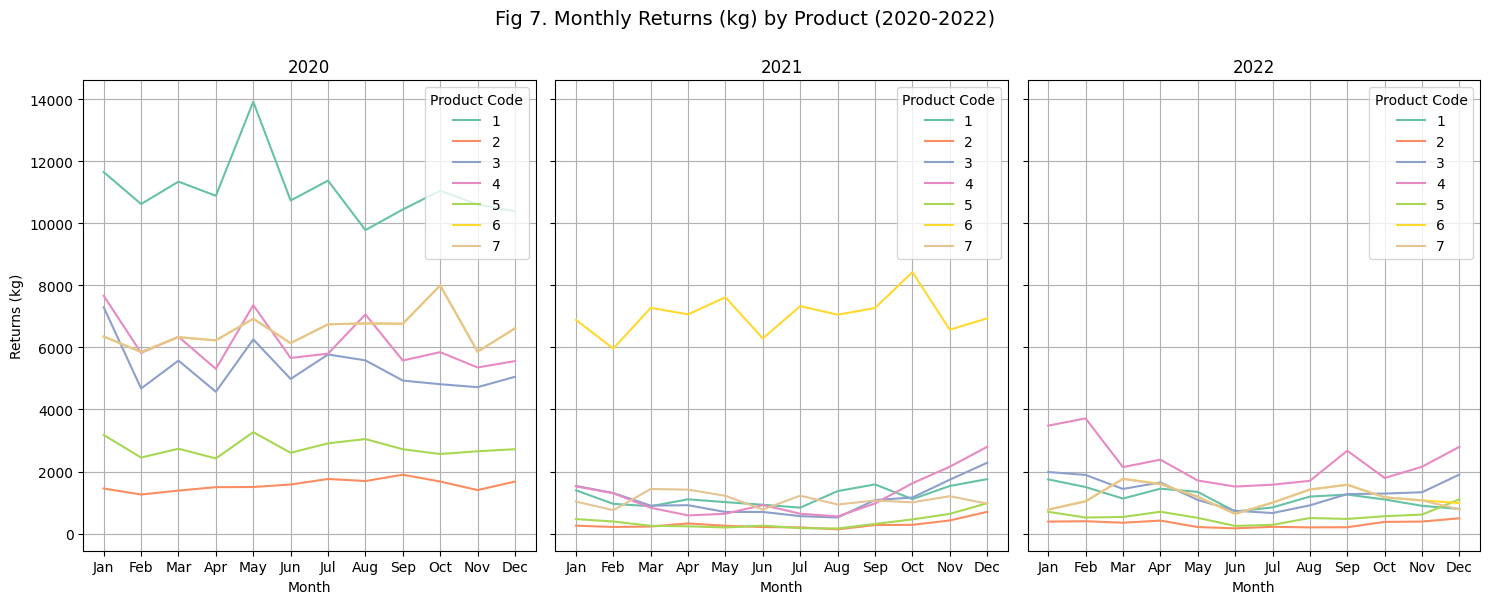

In [60]:
# Plotting the monthly values of 'daily_unit_return_in_kg' for all products through 3 years
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")
years = [2020, 2021, 2022]
month_abbreviations = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
for idx, year in enumerate(years):
    yearly_data = product[product['Year'] == year]
    monthly_returns = yearly_data.groupby(['product_code', 'month'])['daily_unit_return_in_kg'].sum().reset_index()
    colors = sns.color_palette("Set2", len(monthly_returns['product_code'].unique()))
    for idx2, product_code in enumerate(monthly_returns['product_code'].unique()):
        subset = monthly_returns[monthly_returns['product_code'] == product_code]
        axes[idx].plot(subset['month'], subset['daily_unit_return_in_kg'], label=product_code, color=colors[idx2])
    axes[idx].set_title(year)
    axes[idx].set_xlabel('Month', fontsize=10)
    axes[idx].grid(True)
    axes[idx].legend(title='Product Code', loc='upper right')
    axes[idx].set_xticks(range(1, 13))
    axes[idx].set_xticklabels(month_abbreviations)
axes[0].set_ylabel('Returns (kg)', fontsize=10)
plt.suptitle('Fig 7. Monthly Returns (kg) by Product (2020-2022)', fontsize=14, y=1)
plt.tight_layout()
plt.show()

**We observe that**
- The lowest total returns in 2020 are higher than most of the total returns in 2021 and 2022 for all products. We will explore the reasons later.
- The Product 1 returns are exceptionally high in 2020, which is confirmed by Average Daily Returns (Fig 4).
- Product 6 maintains it's unusual behaviour in 2021 and has high returns. We will explore the behaviour of Product 6 later.
- The return patterns for Products 6 & 7 are the exact same. We assume that Mevgal is following the exact same strategy for both the products, which explains the overlap in all the analysis for Products 6 & 7 for 2020 and 2022, i.e. Total Sales (Fig 1), Points of Distributions (Fig 2), Average Sales per Point of Distribution (Fig 3), Average Daily Returns (Fig 4), percent Returns (Fig 5), Total Shipped (kg) (Fig 6) as well as the Monthly Returns (kg).
- Product 2's consistent performance with lowest returns yet again strengthens our belief that it can be the best performer.

Why are the returns in 2020 much higher than 2020 and 2022?

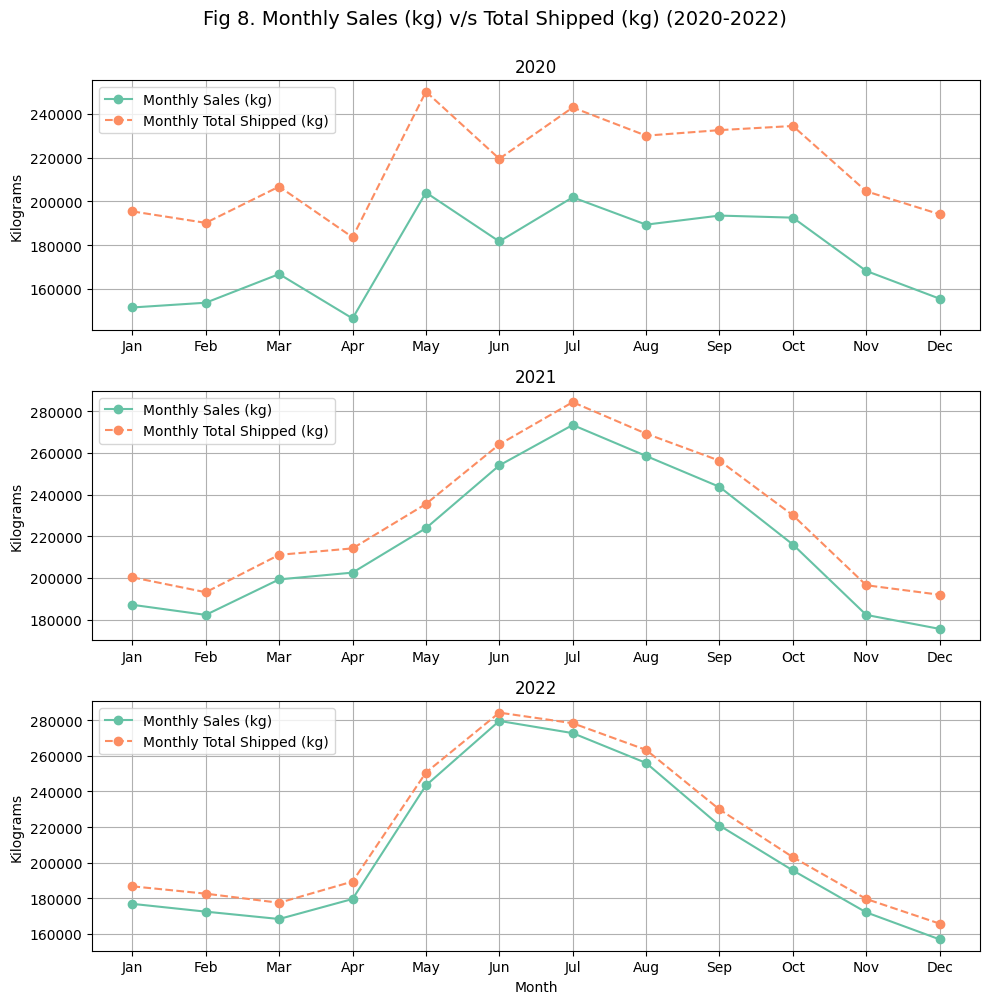

In [61]:
# Plotting Monthly Comparison of 'daily_unit_sales_kg' and 'total_shipped_kg' through 3 years
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Set2")

order_of_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_abbreviations = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_aggregated_data_new = product.groupby(['Year', 'Month']).agg({
    'daily_unit_sales_kg': 'sum',
    'total_shipped_kg': 'sum'
}).reset_index()

monthly_aggregated_data_new['Month'] = pd.Categorical(monthly_aggregated_data_new['Month'], categories=order_of_months, ordered=True)
monthly_aggregated_data_new = monthly_aggregated_data_new.sort_values(by=['Year', 'Month'])

fig, axes = plt.subplots(3, 1, figsize=(10, 10))
colors = sns.color_palette("Set2", 2)

for idx, year in enumerate([2020, 2021, 2022]):
    yearly_data = monthly_aggregated_data_new[monthly_aggregated_data_new['Year'] == year]
    axes[idx].plot(yearly_data['Month'], yearly_data['daily_unit_sales_kg'], label='Monthly Sales (kg)', marker='o', color=colors[0])
    axes[idx].plot(yearly_data['Month'], yearly_data['total_shipped_kg'], label='Monthly Total Shipped (kg)', linestyle='--', marker='o', color=colors[1])
    axes[idx].set_title(year)
    axes[idx].set_ylabel('Kilograms', fontsize=10)
    axes[idx].xaxis.set_major_locator(plt.FixedLocator(range(0, 12)))
    axes[idx].set_xticklabels(month_abbreviations)
    axes[idx].legend(loc='upper left')
    axes[idx].grid(True)

plt.suptitle('Fig 8. Monthly Sales (kg) v/s Total Shipped (kg) (2020-2022)', fontsize=14, y=1)
plt.xlabel('Month', fontsize=10)
plt.tight_layout()
plt.show()

**We know that**

- The COVID-19 response in Greece started in early 2020 [4], which restricted the outdoor movement of the consumers and the manufacturers. This explains our observation where the average returns (Fig 4) for 2020 are exceptionally high.
- Over the course of three years, the effect of COVID-19 on company operations and consumer behvaiour is seen to be wearing off, which is why we can see and increasingly smaller difference between the 'total_shipped_kg' and 'daily_unit_sales_kg'.

### 3.Package Size Analysis

After looking at the performance metrics for all products over the three years, we dive into the inconsistent performance for Product 6 in 2021.

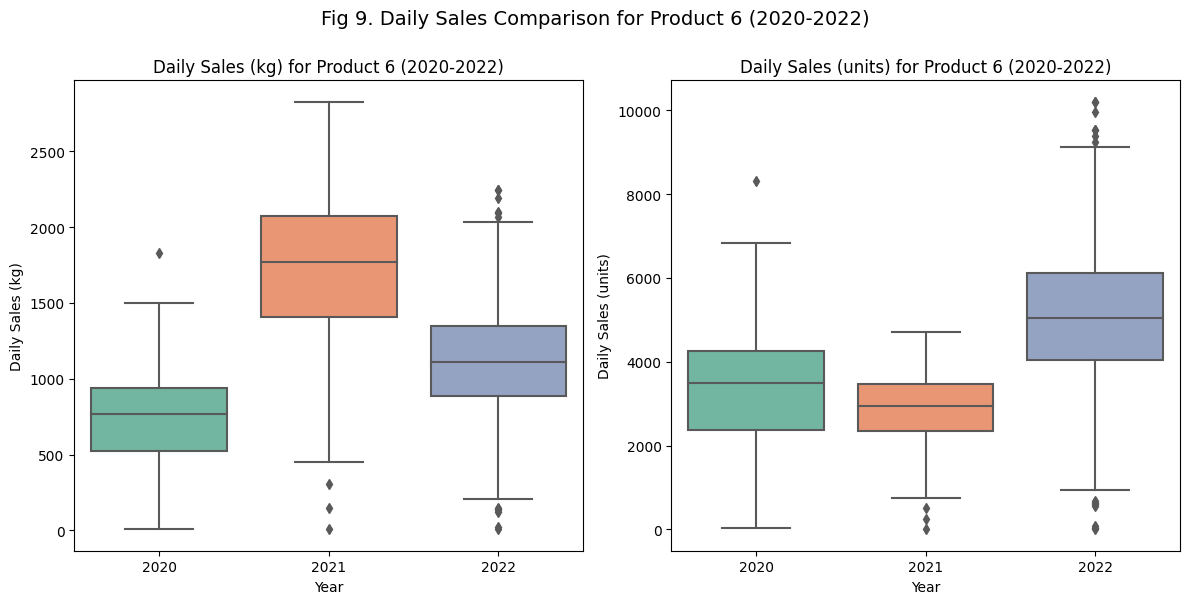

In [63]:
# Plotting Comparison for 'daily_unit_sales_kg' and 'daily_unit_sales' for Product 6 over 3 years
p6 = product[product['product_code'] == 6]

fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.boxplot(data=p6, x='Year', y='daily_unit_sales_kg', palette=sns.color_palette("Set2"),ax=axes[0])

axes[0].set_title('Daily Sales (kg) for Product 6 (2020-2022)', fontsize=12)
axes[0].set_ylabel('Daily Sales (kg)', fontsize=10)

sns.boxplot(data=p6, x='Year', y='daily_unit_sales', palette=sns.color_palette("Set2"),ax=axes[1])

axes[1].set_title('Daily Sales (units) for Product 6 (2020-2022)', fontsize=12)
axes[1].set_xlabel('Year', fontsize=10)
axes[1].set_ylabel('Daily Sales (units)', fontsize=10)

plt.suptitle('Fig 9. Daily Sales Comparison for Product 6 (2020-2022)', y=1, fontsize=14)
plt.tight_layout()
plt.show()

**The above comparison tells us that**

- An increase in the total kg sales should ideally imply in an increase in the unit sales for Product 6 in 2021, the opposite of which is observed.
- Even though the shipped value (kg) (Fig 6) for 2021 was much higher, that boost did not translate into unit sales. We can confirm that by looking at the Average Daily Returns (Fig 4).
- The Points of Distribution (Fig 2) also show a jump for Product 6 in 2021.
- All the analyses done before points to the fact that Products 6 & 7 have the exact same performance and strategy for production and distribution, except for year 2021.

Let's look at the 'package_size' variable for all products to see if it shows any anamolies.

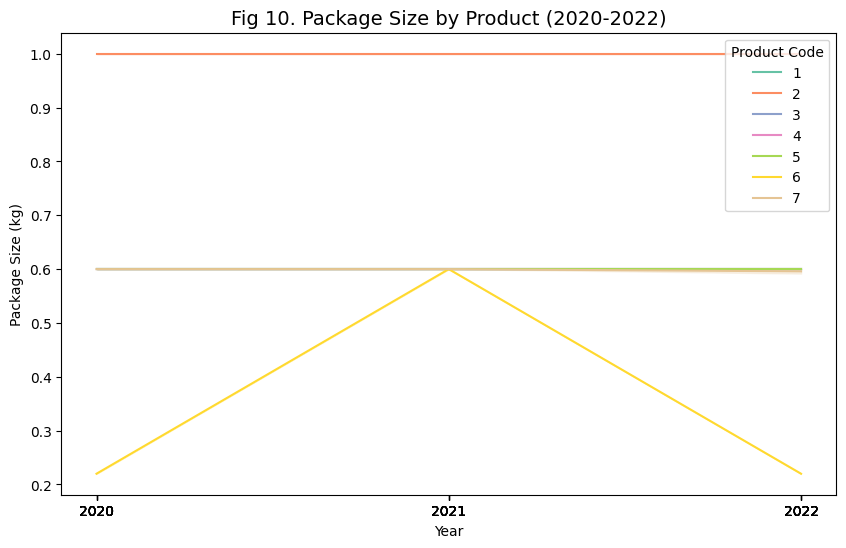

In [64]:
# Plotting the 'package_size' for all products through 3 years
plt.figure(figsize=(10, 6))

sns.lineplot(x='Year', y='package_size', data=product, hue='product_code', palette = sns.color_palette("Set2", n_colors=7))

plt.xlabel('Year', fontsize=10)
plt.ylabel('Package Size (kg)', fontsize=10)
plt.title('Fig 10. Package Size by Product (2020-2022)', fontsize=14)
plt.xticks(distribution_points['Year'])
plt.legend(title='Product Code', loc='upper right')
plt.show()

**We note that**

- The company changed the unit packaging size for Product 6 from 0.22 kg per unit in 2020 to 0.6 kg per unit in 2021, and changed it back to 0.22 kg per unit in 2022. It may partially account for the unusual patterns Product 6 follows.
- We assume that Mevgal was executing A/B Testing on Product 6 in 2021, which explains the changes in all variables for that year. We further assume that the testing might have been a failure as the company shifted Product 6's strategy back in 2022.


### 4.Sales Pattern Over Time

Now that we have seen the effect of returns, changes in package size and points of distribution on sales, let's take a look at the overall sales pattern and determine if it was affected by seasonality or holidays.

In [73]:
print('Fig 11. Monthly Sales Analysis for All Products (2020-2022)')

# Plotting the monthly 'daily_unit_sales_kg' for all products through 3 years
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, Legend
from bokeh.palettes import Spectral11

# Creating a loop for subplots for every product sales over months
product_category = product['product_code'].unique()
plots = []

for product_number in product_category:
    # Filtering data for the current product
    product_data = product[product['product_code'] == product_number]

    # Grouping by month and calculate total sales
    total_sales_kg_by_month_year = product_data.groupby(['month','Year'])['daily_unit_sales_kg'].sum().reset_index()
    total_sales_kg_by_month_year['Total_Sales_kg_in_10_thousands'] = total_sales_kg_by_month_year['daily_unit_sales_kg'] / 10000
    source = ColumnDataSource(data=total_sales_kg_by_month_year)
    all_min=0
    all_max=10

    fig_p = figure(title=f"Monthly Sales (kg) for Product {product_number}",
               x_axis_label = 'Month',
               y_axis_label = 'Total Sales (kg) (in ten thousands)',
               width = 400,
               height = 400,
               y_range = (all_min, all_max),
               tools = "pan, box_zoom, reset, save")
    fig_p.title.align='center'

    set2 = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']
    colors = set2[0:len(total_sales_kg_by_month_year['Year'].unique())]
    for i, year in enumerate(total_sales_kg_by_month_year['Year'].unique()):
        year_data = total_sales_kg_by_month_year[total_sales_kg_by_month_year['Year'] == year]
        source = ColumnDataSource(data=year_data)
        line = fig_p.line(x='month', y='Total_Sales_kg_in_10_thousands', source=source, color=colors[i], legend_label=str(year))
        circles = fig_p.circle(x='month', y='Total_Sales_kg_in_10_thousands', source=source, size=5, color=colors[i], alpha=0.8)

    hover = HoverTool(renderers=[line], tooltips=[("Month", "@month"), ("Total Sales", "@Total_Sales_kg_in_10_thousands")])
    fig_p.add_tools(hover)
    fig_p.title.text_font_size = '12pt'
    fig_p.xaxis.axis_label_text_font_size = '10pt'
    fig_p.yaxis.axis_label_text_font_size = '10pt'

    plots.append(fig_p)

output_notebook()
show(gridplot(plots, ncols=7))

Fig 11. Monthly Sales Analysis for All Products (2020-2022)


Overview

- We observe the overall monthly sales pattern for all Products. We see a higher sales value in the months of June to September.
- We see a spike in the sales of Product 4 in 2022. This can be accounted for by the increase in Points of Distribution (Fig 2) as discussed earlier.
- Product 6 also shows a different sales pattern in 2021. We have discussed the possible reasons for this behaviour in above analyses(Fig 9, Fig 10).

We go into further detail and examine the sales patterns for all Products by Season through the 3 years.

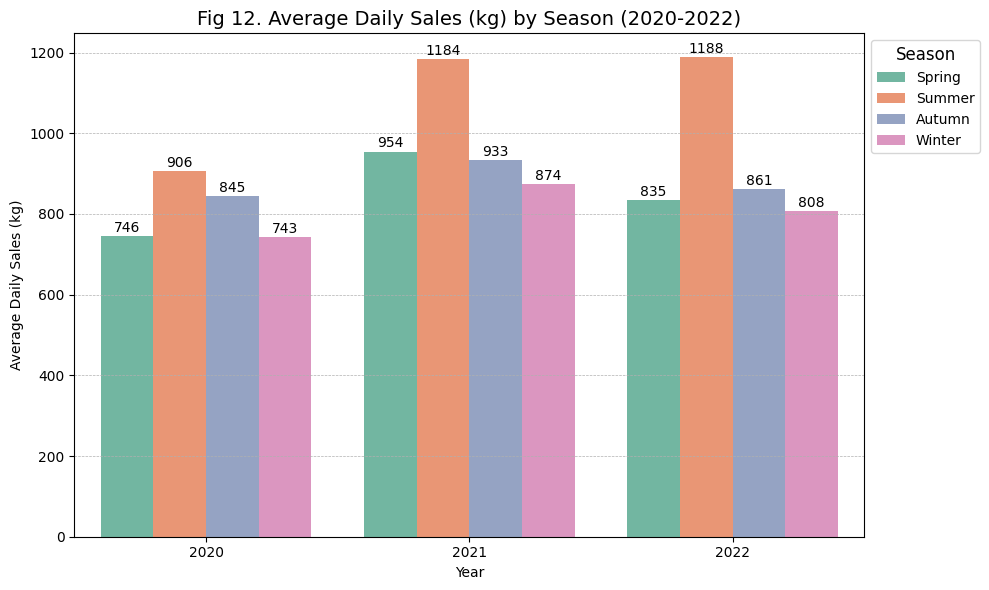

In [66]:
# Plotting Average 'daily_unit_sales_kg' for Product by Season through 3 years
product_new=product.copy()
plt.figure(figsize=(10, 6))
def assign_season(month):
    if month in [3, 4]:
        return 'Spring'
    elif month in [5, 6, 7, 8, 9]:
        return 'Summer'
    elif month in [10, 11]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Winter'
product_new['season'] = product_new['month'].apply(assign_season)
product_season=product_new.groupby(['season'])['daily_unit_sales_kg'].mean().reset_index()

season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
ax2=sns.barplot(x='Year',y='daily_unit_sales_kg',hue='season', data=product_new, hue_order=season_order, palette='Set2', errorbar=None)
plt.title('Fig 12. Average Daily Sales (kg) by Season (2020-2022)', fontsize=14)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Average Daily Sales (kg)', fontsize=10)

# Annotating the bars with their values
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.0f}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center',
                fontsize=10)
plt.legend(title='Season', title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

**Summer is the Best!**
- The sales patterns confirm our traditional beliefs that yogurt is most and best consumed in the summer.

Let's confirm if Weekends and National Holidays have any influence on yogurt sales.

In [49]:
# Creating a new 'day_type' column to mark Weekends and National Holidays

holidays = ['2020-01-01', '2020-01-06', '2020-03-02', '2020-03-25', '2020-04-17', '2020-04-20', '2020-05-01', '2020-06-07', '2020-06-08', '2020-08-15', '2020-10-28', '2020-12-25', '2020-12-26', '2021-01-01', '2021-01-06', '2021-03-15', '2021-03-25', '2021-04-30', '2021-05-03', '2021-05-04', '2021-06-20', '2021-06-21', '2021-08-15', '2021-10-28', '2021-12-25', '2021-12-26', '2022-01-01', '2022-01-06', '2022-03-07', '2022-03-25', '2022-04-22', '2022-04-25', '2022-05-02', '2022-06-12', '2022-06-13', '2022-08-15', '2022-10-28', '2022-12-25', '2022-12-26']

def day_type_cat(date):
  if date.strftime('%Y-%m-%d') in holidays:
    return 'National Holiday'
  elif date.weekday() < 5:
    return 'Weekday'
  else:
    return 'Weekend'

product['day_type'] = product['Date'].apply(day_type_cat)

print(product['day_type'])

0       National Holiday
1                Weekday
2                Weekday
3                Weekend
4                Weekend
              ...       
7636             Weekend
7637             Weekday
7638             Weekday
7639             Weekday
7640             Weekday
Name: day_type, Length: 7640, dtype: object


In [68]:
# Plotting pattern of 'total_shipped_kg' by 'day_type' for all products over 3 years

from bokeh.models import CustomJS, Select
from bokeh.layouts import column
from bokeh.plotting import figure, show, output_notebook, output_file
from bokeh.models import ColumnDataSource, HoverTool

weekday_shipped = product[product['day_type']=='Weekday']
weekend_shipped = product[(product['day_type'] == 'Weekend') | (product['day_type']=='National Holiday')]

fig=figure(x_axis_label='Date', y_axis_label='Daily Shipped (kg)', title='Fig 13. Daily Shipped (kg) by Day Type (2020-2022)',
           x_axis_type='datetime', width=1000, height=600)
fig.title.text_font_size = '14pt'
fig.title.align='center'
fig.xaxis.axis_label_text_font_size = '10pt'
fig.yaxis.axis_label_text_font_size = '10pt'

weekdays_glyph = fig.circle(x="Date", y='total_shipped_kg', color="#66c2a5", alpha=0.7, source=weekday_shipped)
weekend_glyph = fig.circle(x='Date', y='total_shipped_kg', color='#fc8d62', alpha=0.7, source=weekend_shipped)
weekend_glyph.visible=False

menu=['Weekend or Holiday', 'Weekday']

callback=CustomJS(args=dict(scatter_1=weekdays_glyph, scatter_2=weekend_glyph),
                  code="""scatter_1.visible = true;
                  scatter_2.visible = true;
                  if (this.value == "Weekday") {
                    scatter_2.visible = false;
                    } else {
                      scatter_1.visible = false;
                    }""")

menu=Select(options=menu, value='Weekday', title='Day Type')
menu.js_on_change('value', callback)
output_file(filename='daily_shipped_by_day_type.html')
layout=column(menu,fig)
show(layout)

**Revelations**
- We see no prominent differences in the sales on weekdays and on weekends or national holidays.
- The only visible pattern is that the consumption is comparatively higher on weekdays, but there is no definite pattern.

<Figure size 1000x600 with 0 Axes>

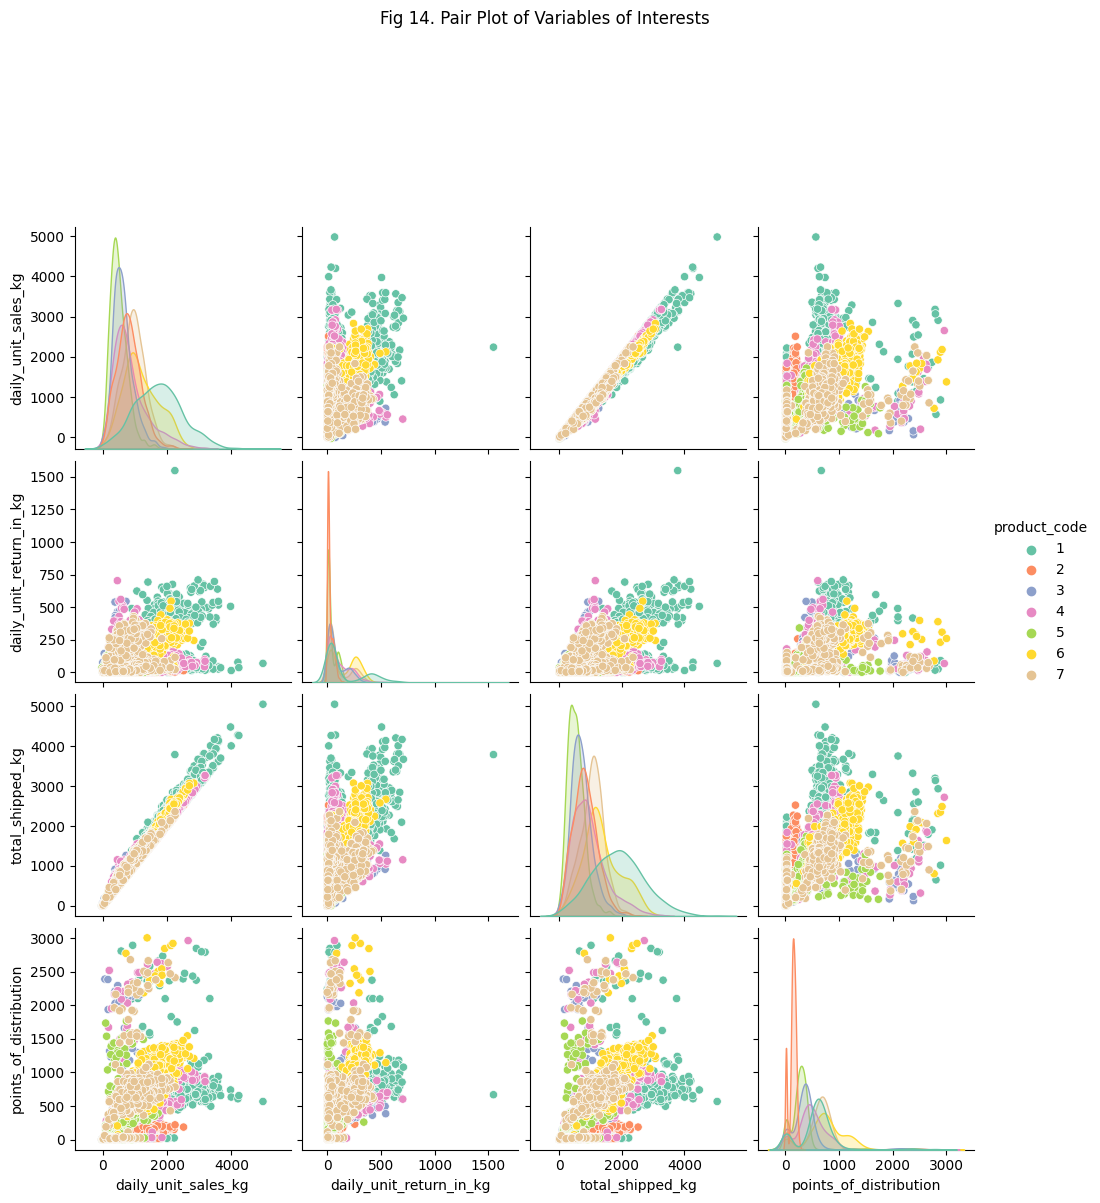

In [71]:
# Plotting the Variables of Interests
plt.figure(figsize=(10, 6))
prod_new = product[['product_code', 'daily_unit_sales_kg', 'daily_unit_return_in_kg', 'total_shipped_kg', 'points_of_distribution']]
sns.pairplot(prod_new, hue='product_code', height=2.5, palette = sns.color_palette('Set2', n_colors=7))
plt.suptitle('Fig 14. Pair Plot of Variables of Interests', y=1.2)
plt.show();

The pairplot confirms all the dependencies we have assumed throughout our analysis.

---

# V. Challenges

In our sales data analysis, we encountered some challenges and devised effective solutions to solve them. Firstly, we had 14 columns to begin with, which only offered limited information about these products. To solve the problem of limited data columns in the dataset, we created new metric columns for deeper analysis. These additional columns, such as total product shipped in kg, package size, etc., gave us more dimensions to work with and extract valuable insights from the data. We also reorganized the date columns so that we can use them effectively in visualizations to reveal trends over time, thereby enhancing the richness of the overall analysis.
Also, recognizing the impact of the COVID-19 pandemic on sales, we drilled down into shipment and return data for all products during the pandemic. By doing so, we were able to identify patterns and trends affected by pandemic-related lockdowns to better understand how external factors impact sales. Last but not least, We encountered a suspicious entry in the dataset, which is February 29, 2021, in Product 6, when it's not supposed to be a date in February 2021. We decided to delete this row to match the practical calendar. This operation ensures the integrity of the data set, eliminating any anomalies that may affect the accuracy of the analysis.



---



# VI. Conclusion

After a comprehensive analysis of the sales data for seven Mevgal products over the years 2020 to 2022, we have arrived at several key findings that shed light on the performance and strategies of these products. Our conclusions are based on a series of visualizations and observations, each contributing to a better understanding of the dynamics within the dataset.

According to our analysis, Product 2 is the best performer of all and can become the highest revenue generator if given the right support by increasing the points of distribution.

We observed that Summer is the best season for yogurt sales and that holidays and weekends have little to none effect on the sales performance.



---



# VII. References



[1] I. Siniosoglou, K. Xouveroudis, V. Argyriou, T. Lagkas, S. K. Goudos, K. E. Psannis and P. Sarigiannidis,  "**Evaluating the Effect of Volatile Federated Timeseries on Modern DNNs: Attention over Long/Short  Memory**," in the 12th International Conference on Circuits and Systems Technologies (MOCAST  2023), April 2023, Accepted

[2] Mevgal. MEVGAL. (2019, November 29). https://mevgal.com/

[3] Mevgal Logo. (n.d.). Food | Farsons Group. https://www.farsons.com/en/food

[4] National Center for Biotechnology Information, National Library of Medicine, **Cultural responses to the COVID-19 crisis in Greece: The first wave (March–May 2020)**. [Reference](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9845843/#:~:text=After%20September%20the%20situation%20worsened,7%2C000%20deaths%20in%20March%202021)

[5] M. Soltanieh-ha, "**BA780 - Introduction to Data Anaytics**", Colab Notebooks, Fall 2023

[6] Datacamp Modules



---

